## Sentiment Analysis in Python
- In this notebook we will be doing some sentiment analysis in python using two different techniques:
- 1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
- 2. Roberta Pretrained Model from a
- 3. Huggingface Pipeline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [8]:
df = pd.read_csv(r'C:\Users\RITESH\Desktop\amazone_sentiment_analysis\reviews\Reviews.csv')
save_df = df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [146]:
# working on the 500 data set 
df_ = df.head(500)
save_df = df_
save_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


### Quick EDA

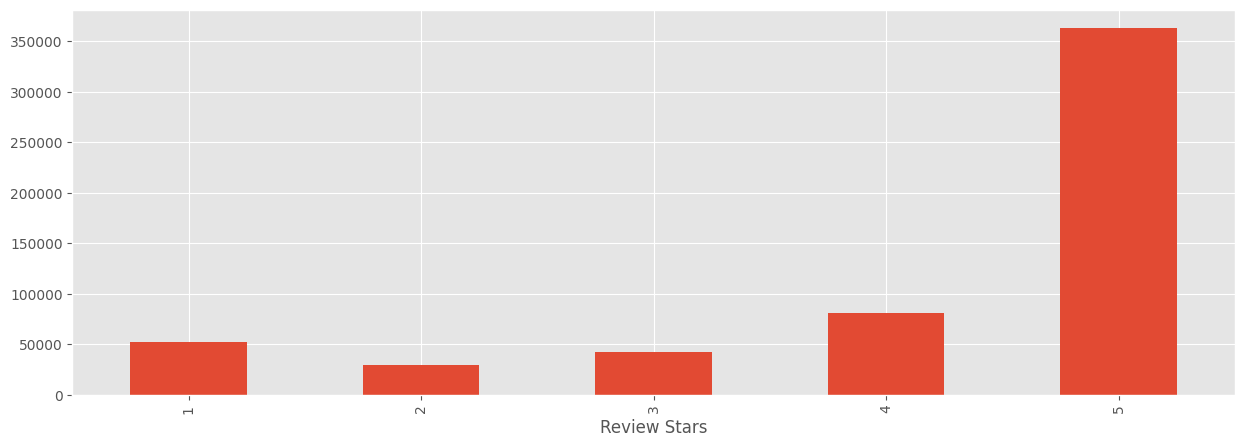

In [36]:
ax = df['Score'].value_counts().sort_index().plot(kind= 'bar' , figsize = (15,5))
ax.set_xlabel('Review Stars')
plt.show()

### nltk

In [46]:
example  = df_['Text'][50]
tokens  = nltk.word_tokenize(example) # tokens so that computer can interpret 
tokens[:10] # working on the first ten 

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [51]:
# Getting the partofspeech of each word 
nltk.download('averaged_perceptron_tagger_eng')  #importthis module
tagged = nltk.pos_tag( tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

### Step 1. VADER Seniment Scoring We will use NLTK's Sentiment IntensityAnalyzer to get the neg/neu/pos scores of the text. 
- This uses a "bag of words" approach: 
    - 1. Stop words are removed 
    - 2. each word is scored and combined to a total score.

In [54]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


In [62]:
#Run polarityscore on 1 dataset 
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [73]:
#Run polarityscore on whole dataset
res = {}
for i, row in tqdm(df_.iterrows() , total = len(df_)):
    text =  row['Text']
    myid = row['Id']
    res[myid]=sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [86]:
# making dataframe of res
vaders  = pd.DataFrame(res).transpose()
vaders

# df_ merge them into vaders
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
# Now we have sentiment score and data in one frame 
vanders = vaders.merge( right =df_, how = 'left',on='Id')

### Plot the vander 

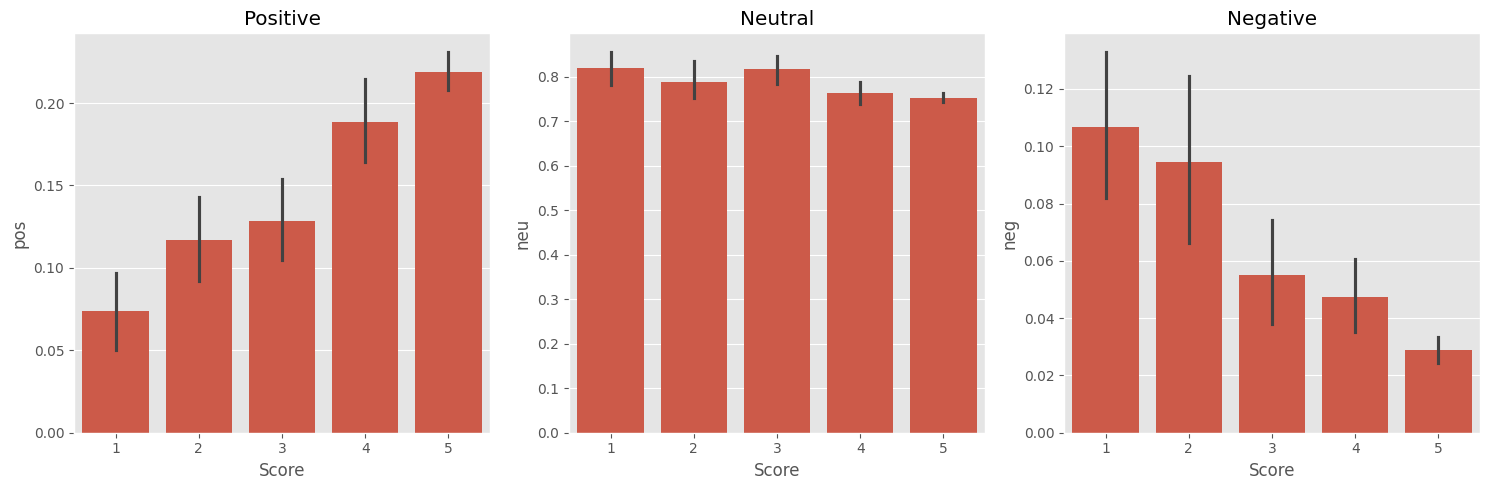

In [102]:
fig,axs = plt.subplots(1,3 ,figsize=(15,5))
sns.barplot(data=vanders ,x='Score' , y='pos' , ax=axs[0]  )
sns.barplot(data=vanders ,x='Score' , y='neu' , ax=axs[1])
sns.barplot(data=vanders ,x='Score' , y='neg' , ax=axs[2])

axs[0].set_title('Positive')
axs[2].set_title('Negative')
axs[1].set_title('Neutral')

plt.tight_layout()
plt.show()

### Step 3. Roberta Pretrained Model
- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.l

In [117]:
sia.polarity_scores(df_['Summary'][0])

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [137]:
summary_res = {}

for i , row in tqdm(df_.iterrows() , total = len(df_)):
    text = row['Text']
    myId = row['Id']
    summary_res[myId] = sia.polarity_scores(text)

summary_res

  0%|          | 0/500 [00:00<?, ?it/s]

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [140]:
res_s = pd.DataFrame(summary_res).transpose()


,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [147]:
res_s = res_s.reset_index().rename(columns= {'index':'Id'})
res_s

,Id,Id,neg,neu,pos,compound
0,0,1,0.000,0.695,0.305,0.9441
1,1,2,0.138,0.862,0.000,-0.5664
2,2,3,0.091,0.754,0.155,0.8265
3,3,4,0.000,1.000,0.000,0.0000
4,4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...
495,495,496,0.000,0.554,0.446,0.9725
496,496,497,0.059,0.799,0.142,0.7833
497,497,498,0.025,0.762,0.212,0.9848
498,498,499,0.041,0.904,0.055,0.1280
